<a href="https://colab.research.google.com/github/fufi-tuti/dataMiningprj/blob/main/GiniTree2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

In [ ]:
file_path = "/content/final_selected_data.csv"
df = pd.read_csv(file_path)

In [ ]:
X = df.drop(columns=['Depression'])
y = df['Depression']

In [ ]:
# Define different test sizes (70/30, 80/20, 90/10)
test_sizes = [0.3, 0.2, 0.1]

# To store results
results = []


Train/Test Split: 70/30
Accuracy: 0.7769010043041606
Confusion Matrix:
 [[2328 1163]
 [ 703 4170]]
Tree Depth: 4
Number of Leaves: 11


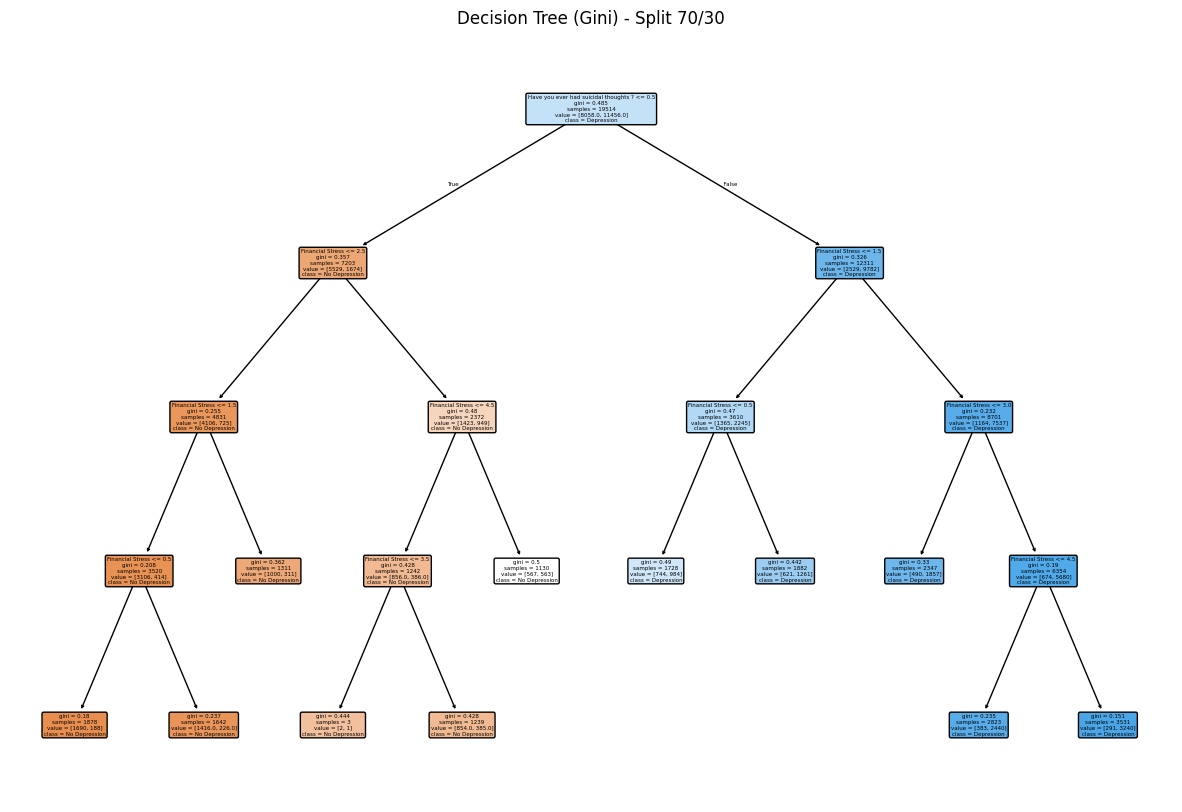

Train/Test Split: 80/20
Accuracy: 0.781025824964132
Confusion Matrix:
 [[1545  771]
 [ 450 2810]]
Tree Depth: 4
Number of Leaves: 11


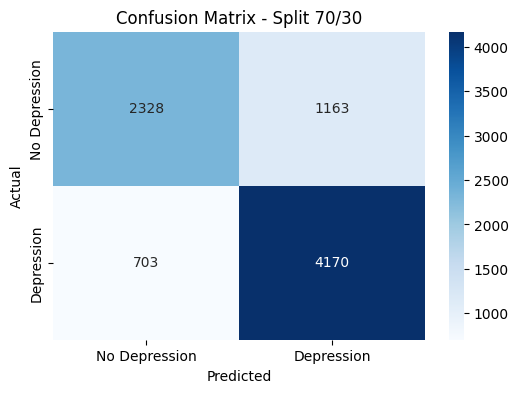

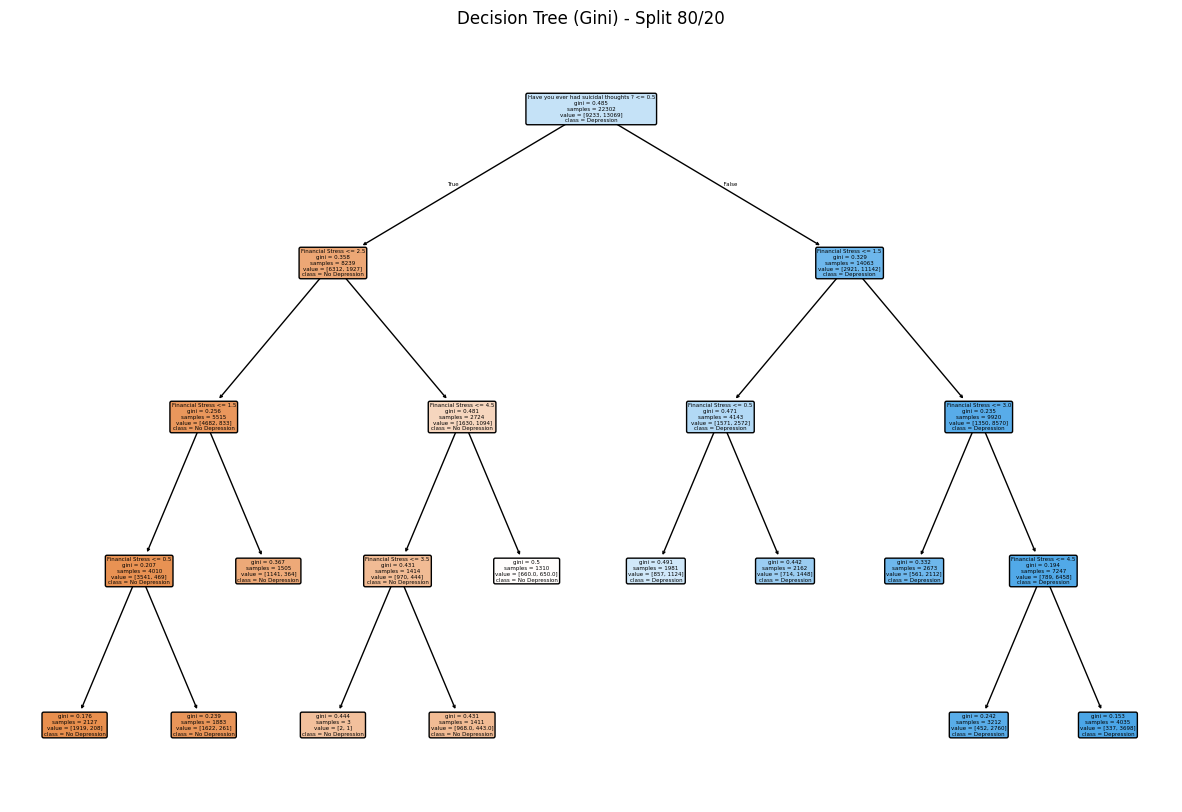

Train/Test Split: 90/10
Accuracy: 0.7815638450502153
Confusion Matrix:
 [[ 779  390]
 [ 219 1400]]
Tree Depth: 4
Number of Leaves: 11


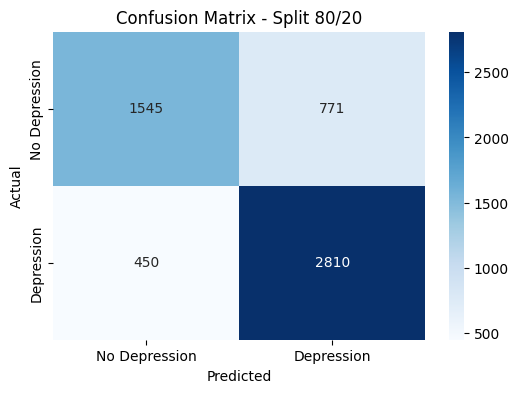

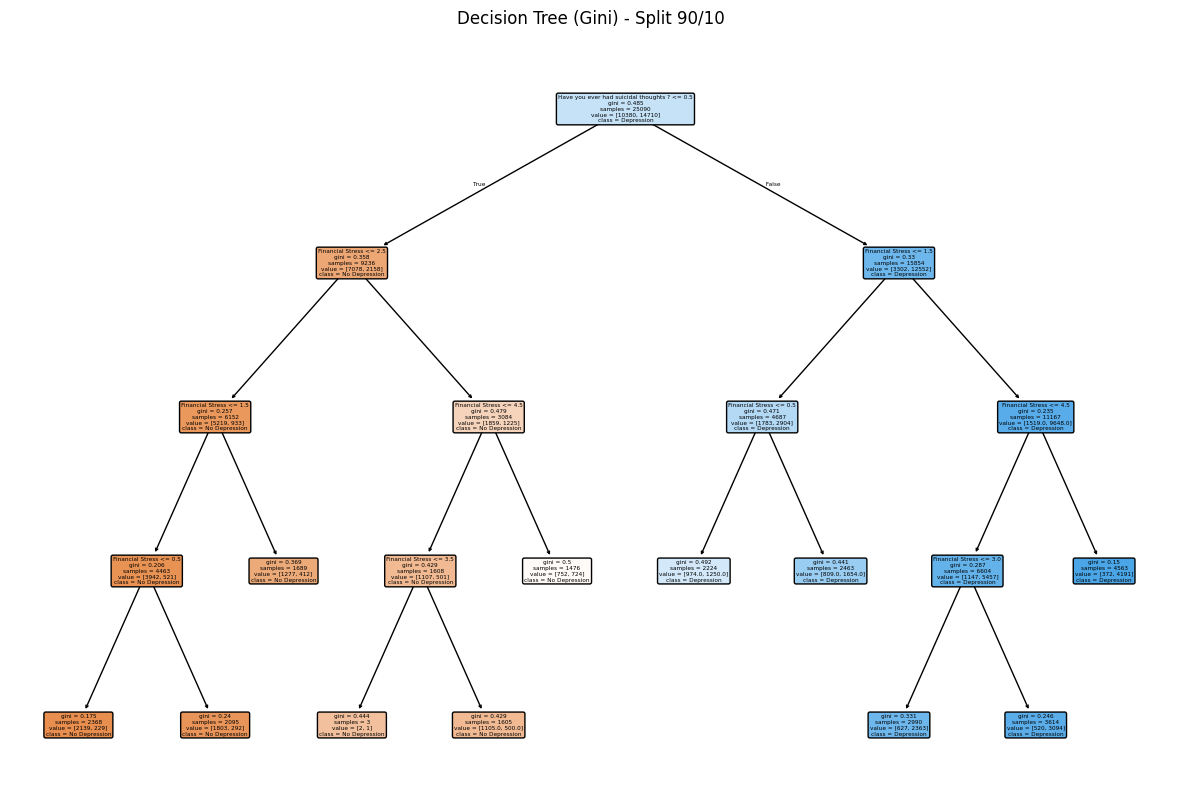

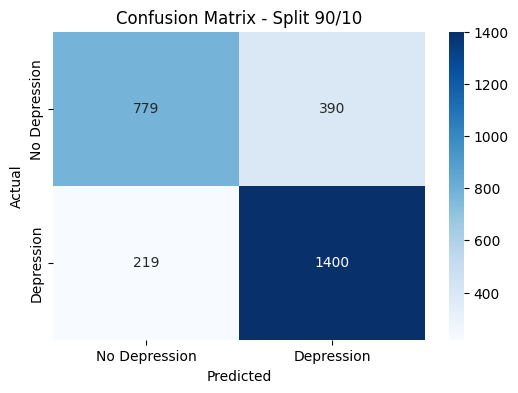

In [ ]:
for test_size in test_sizes:
    train_size = int((1 - test_size) * 100)
    print("="*60)
    print(f"Train/Test Split: {train_size}/{int(test_size*100)}")

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42)

    # Create Decision Tree classifier using Gini
    model = DecisionTreeClassifier(criterion="gini", random_state=42)
    model.fit(X_train, y_train)

    # Predicting
    y_pred = model.predict(X_test)

    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    depth = model.get_depth()
    leaves = model.get_n_leaves()

    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", conf_matrix)
    print("Tree Depth:", depth)
    print("Number of Leaves:", leaves)

    # Save results
    results.append({
        "Split": f"{train_size}/{int(test_size*100)}",
        "Accuracy": round(accuracy, 4),
        "Depth": depth,
        "#Leaves": leaves,
        "Confusion Matrix": conf_matrix.tolist()
    })

    # 7. Visualizing Decision Tree
    plt.figure(figsize=(15, 10))
    tree.plot_tree(model, filled=True, feature_names=X.columns,
                   class_names=["No Depression", "Depression"],
                   rounded=True)
    plt.title(f"Decision Tree (Gini) - Split {train_size}/{int(test_size*100)}")
    plt.show()

    # Visualizing Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No Depression", "Depression"],
                yticklabels=["No Depression", "Depression"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - Split {train_size}/{int(test_size*100)}")
